In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


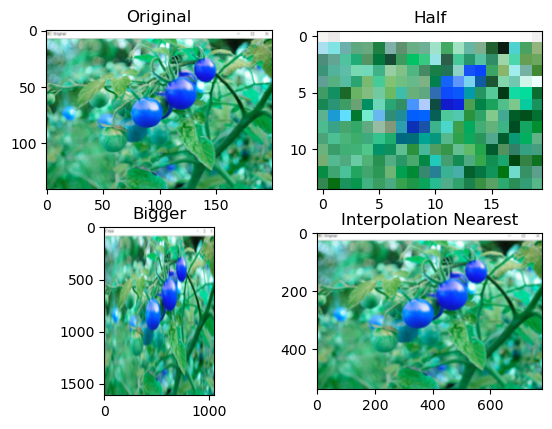

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"geeksforgeeks.png")

half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540), 
               interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])

plt.show()


In [1]:
import matplotlib
matplotlib.use('TkAgg') 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("geeks.png")

# Converting BGR color to RGB color format
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#Displaying image using plt.imshow() method
plt.imshow(RGB_img)

# hold the window
plt.waitforbuttonpress()
plt.close('all')


In [5]:
import cv2 

# path 
path = r'geeksforgeeks.png'

# Using cv2.imread() method 
# Using 0 to read image in grayscale mode 
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 

# Displaying the image 
cv2.imshow('image', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2 

image = cv2.imread('paint.png') 
B, G, R = cv2.split(image) 
# Corresponding channels are separated 

cv2.imshow("original", image) 
cv2.waitKey(0) 

cv2.imshow("blue", B) 
cv2.waitKey(0) 

cv2.imshow("Green", G) 
cv2.waitKey(0) 

cv2.imshow("red", R) 
cv2.waitKey(0) 

cv2.destroyAllWindows() 



In [9]:
import cv2 
import numpy as np 

image = cv2.imread('geeks.png') 

cv2.imshow('Original Image', image) 
cv2.waitKey(0) 

# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.waitKey(0) 

# Median Blur 
median = cv2.medianBlur(image, 5) 
cv2.imshow('Median Blurring', median) 
cv2.waitKey(0) 


# Bilateral Blur 
bilateral = cv2.bilateralFilter(image, 9, 75, 75) 
cv2.imshow('Bilateral Blurring', bilateral) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [13]:
import numpy as np 
import cv2 

cap = cv2.VideoCapture('videoclip.jpg') 
fgbg = cv2.createBackgroundSubtractorMOG2() 

while(1): 
	ret, frame = cap.read() 
	if not ret:
		print("Failed to capture frame")
		break

	fgmask = fgbg.apply(frame) 

	cv2.imshow('fgmask', fgmask) 
	cv2.imshow('frame', frame) 

	k = cv2.waitKey(30) & 0xff
	if k == 27: 
		break

cap.release() 
cv2.destroyAllWindows() 


Failed to capture frame


In [15]:
import cv2 
import numpy as np 

image = cv2.imread('videoclip.jpg') 

# Store height and width of the image 
height, width = image.shape[:2] 

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 

# We use warpAffine to transform 
# the image using the matrix, T 
img_translation = cv2.warpAffine(image, T, (width, height)) 

cv2.imshow("Originalimage", image) 
cv2.imshow('Translation', img_translation) 
cv2.waitKey() 

cv2.destroyAllWindows() 


In [19]:
import cv2
import numpy as np
import os

# Debugging: Check if the file exists
if not os.path.exists('videoclip.jpg'):
    print("Error: videoclip.jpg not found in the working directory:", os.getcwd())
    exit()

image = cv2.imread('videoclip.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Check file format and path.")
    exit()

# Store height and width of the image
height, width = image.shape[:2]

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

# Apply the affine transformation
img_translation = cv2.warpAffine(image, T, (width, height))

cv2.imshow("Original Image", image)
cv2.imshow("Translated Image", img_translation)
cv2.waitKey()
cv2.destroyAllWindows()




In [ ]:
import cv2 
import numpy as np 

# Read image. 
img = cv2.imread('eye.jpg', cv2.IMREAD_COLOR) 

# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 

# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred, 
				cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
			param2 = 30, minRadius = 1, maxRadius = 40) 

# Draw circles that are detected. 
if detected_circles is not None: 

	# Convert the circle parameters a, b and r to integers. 
	detected_circles = np.uint16(np.around(detected_circles)) 

	for pt in detected_circles[0, :]: 
		a, b, r = pt[0], pt[1], pt[2] 

		# Draw the circumference of the circle. 
		cv2.circle(img, (a, b), r, (0, 255, 0), 2) 

		# Draw a small circle (of radius 1) to show the center. 
		cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
		cv2.imshow("Detected Circle", img) 
		cv2.waitKey(0) 


In [3]:
from detection import detect

import cv2 
video_capture = cv2.VideoCapture(0) 
#while video_capture.isOpened(): 
# Captures video_capture frame by frame 
	frame = video_capture.read() 

	# To capture image in monochrome					 
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
	
	# calls the detect() function	 
	canvas = detect(gray, frame) 

	# Displays the result on camera feed					 
	cv2.imshow('Video', canvas) 

	# The control breaks once q key is pressed						 
	if cv2.waitKey(1) & 0xff == ord('q'):			 
		break

# Release the capture once all the processing is done. 
video_capture.release()								 
cv2.destroyAllWindows() 


IndentationError: unexpected indent (548241898.py, line 7)

In [9]:
# Python program to explain cv2.line() method 
 
# importing cv2 
import cv2 
 
# path 
path = r'geeks14.png'
 
# Reading an image in default mode
image = cv2.imread(path)
 
# Window name in which image is displayed
window_name = 'Image'

# Start coordinate, here (0, 0)
# represents the top left corner of image
start_point = (0, 0)

# End coordinate, here (250, 250)
# represents the bottom right corner of image
end_point = (250, 250)

# Green color in BGR
color = (0, 255, 0)

# Line thickness of 9 px
thickness = 9

# Using cv2.line() method
# Draw a diagonal green line with thickness of 9 px
9image = cv2.line(image, start_point, end_point, color, thickness)

# Displaying the image 
cv2.imshow(window_name, image) 
